La matriz de densidad queda determinada por:

\begin{equation} \label{eq1}
\begin{split}
\dot{\rho_{ab}} = &  -(i\omega_{ab}+\gamma_1)\rho_{ab}-\frac{i}{2}\frac{\wp_{ab}\mathscr{E}}{\hbar}e^{-ivt}(\rho_{aa}-\rho_{bb}) + \frac{i}{2} \Omega_\mu e^{-i\phi_\mu}e^{-i\nu_\mu t}\rho_{cb}
\\
\dot{\rho_{cb}} =  &  -(i\omega_{cb}+\gamma_3)\rho_{cb}-\frac{i}{2}\frac{\wp_{ab}\mathscr{E}}{\hbar}e^{-ivt}\rho_{ca} + \frac{i}{2} \Omega_\mu e^{i\phi_\mu}e^{i\nu_\mu t}\rho_{ab}
\\
\dot{\rho_{ac}} =  &  -(i\omega_{ac}+\gamma_2)\rho_{ac}+\frac{i}{2}\frac{\wp_{ab}\mathscr{E}}{\hbar}e^{-ivt}\rho_{bc} - \frac{i}{2} \Omega_\mu e^{i\phi_\mu}e^{-i\nu_\mu t}(\rho_{aa}-\rho_{cc})
\end{split}
\end{equation}



Entonces podemos elegir
$$ \rho_{ab}=x[1] \\ \rho_{cb}=x[2] \\
\rho_{ac}=x[3] \\
\rho_{aa}=x[4] \\
\rho_{bb}=x[5] \\
\rho_{ca}=x[6] \\
\rho_{cc}=x[7] \\
\rho_{bc}=conj(x[2]) \\
$$

In [10]:
omega_ab=omega_cb=omega_ac=gamma_1=gamma_2=gamma_3=P_ab=E=hbar=nu=nu_mu=phi_nu=omega_nu=1

1

In [13]:
a1=omega_ab*1im+gamma_1
a2=omega_cb*1im+gamma_3
a3=omega_ac*1im+gamma_2
b=P_ab*E/hbar
nu
nu_mu
c=1im/2*omega_nu*exp(phi_nu*1im)
F(x,t)=[-a1*x[1]-b*exp(-nu*t*1im)*(x[4]-x[5])+c*exp(-nu_mu*t*1im)*x[2],
-a2*x[2]-b*exp(-nu*t*1im)*(x[6])+c*exp(-nu_mu*t*1im)*x[1],
-a3*x[3]+b*exp(-nu*t*1im)*(conj(x[2]))-c*exp(-nu_mu*t*1im)*(x[4]-x[7]),0,0,0,0]

F (generic function with 1 method)

In [14]:
X0=[0,0,0,0,1,0,0]

7-element Array{Int64,1}:
 0
 0
 0
 0
 1
 0
 0

In [12]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end

metodo_RK4h (generic function with 1 method)

In [16]:
Data=metodo_RK4h(F,X0,0,1,.0001)

(0.0:0.0001:1.0, Any[[0, 0, 0, 0, 1, 0, 0], Complex{Float64}[9.9995e-5-9.99954e-9im, -2.10331e-9+1.35102e-9im, -7.01162e-14-4.50236e-14im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.00019998-3.99963e-8im, -8.41179e-9+5.40511e-9im, -5.60879e-13-3.60176e-13im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.000299955-8.99875e-8im, -1.89232e-8+1.21638e-8im, -1.89279e-12-1.21555e-12im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.00039992-1.5997e-7im, -3.36355e-8+2.16288e-8im, -4.48621e-12-2.8812e-12im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.000499875-2.49942e-7im, -5.25463e-8+3.38014e-8im, -8.76133e-12-5.62713e-12im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.00059982-3.599e-7im, -7.56535e-8+4.86834e-8im, -1.51382e-11-9.72334e-12im, 0.0+0.0im, 1.0+0.0im, 0.0+0.0im, 0.0+0.0im], Complex{Float64}[0.000699755-4.89841e-7im, -1.02955e-7+6.62763e-8im, -2.40367e-11-1.54397e-11im, 0.0+0.0im, 1.0+0

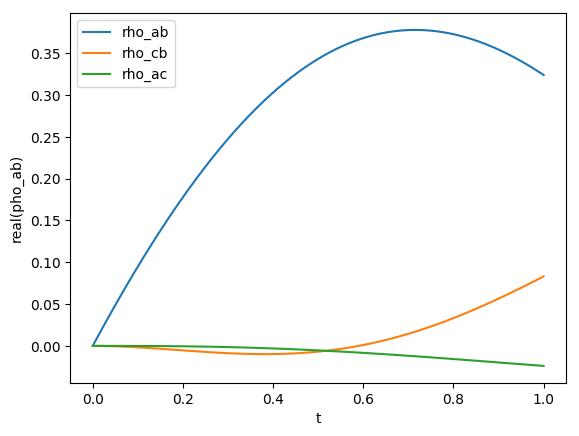

In [29]:
using PyPlot
plot(map(x->x[1],Data[1]),map(x->x[1],real(Data[2])), label="rho_ab")
plot(map(x->x[1],Data[1]),map(x->x[2],real(Data[2])), label="rho_cb")
plot(map(x->x[1],Data[1]),map(x->x[3],real(Data[2])), label="rho_ac")
legend()
xlabel("t")
ylabel("real(pho_ab)")
show()